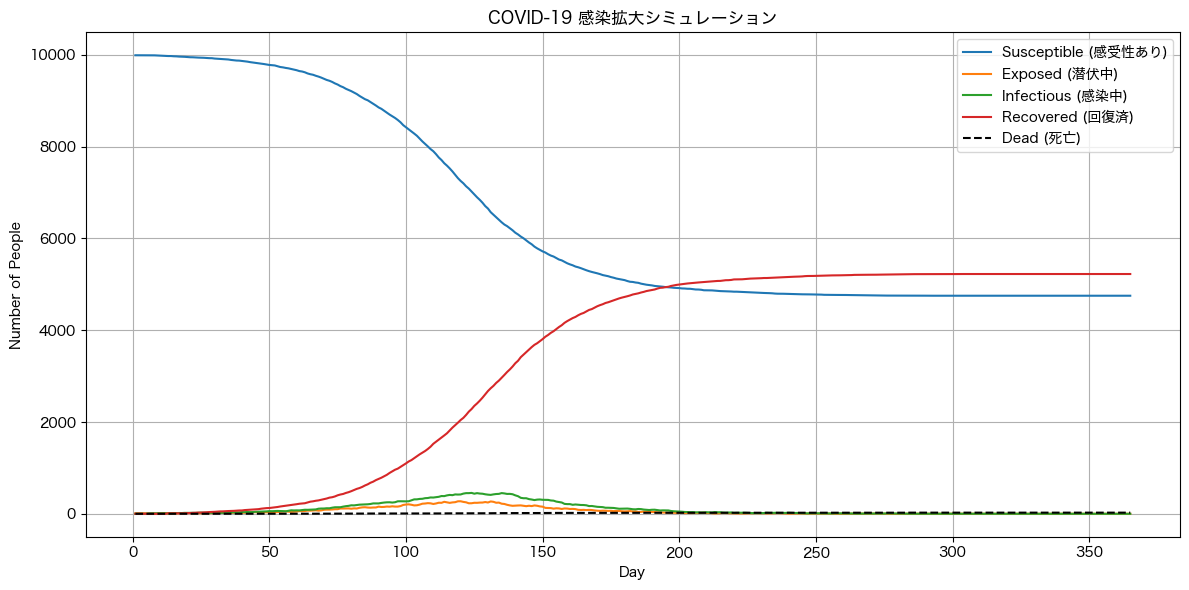

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
import matplotlib.dates as mdates
import pandas as pd
import os

jp_font = fm.FontProperties(fname='/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc')
matplotlib.rc('font', family=jp_font.get_name())

# CSVファイル読み込み（カンマ区切り）
script_dir = os.path.dirname(os.path.abspath(__file__)) if '__file__' in globals() else os.getcwd()
file_path = os.path.join(script_dir, "data/covid_high_precision_sim.csv")
df = pd.read_csv(file_path)

# グラフ描画
plt.figure(figsize=(12, 6))
plt.plot(df['Day'], df['Susceptible'], label='Susceptible (感受性あり)')
plt.plot(df['Day'], df['Exposed'], label='Exposed (潜伏中)')
plt.plot(df['Day'], df['Infectious'], label='Infectious (感染中)')
plt.plot(df['Day'], df['Recovered'], label='Recovered (回復済)')
plt.plot(df['Day'], df['Dead'], label='Dead (死亡)', linestyle='--', color='black')

plt.xlabel('Day')
plt.ylabel('Number of People')
plt.title('COVID-19 感染拡大シミュレーション')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [2]:
script_dir
real_data_path = os.path.join(script_dir, "data/newly_confirmed_cases_daily.csv")
real_data = pd.read_csv(real_data_path)
real_data["Tokyo"]

0          0
1          0
2          0
3          0
4          0
        ... 
1204     994
1205     906
1206    1062
1207    2345
1208    1331
Name: Tokyo, Length: 1209, dtype: int64

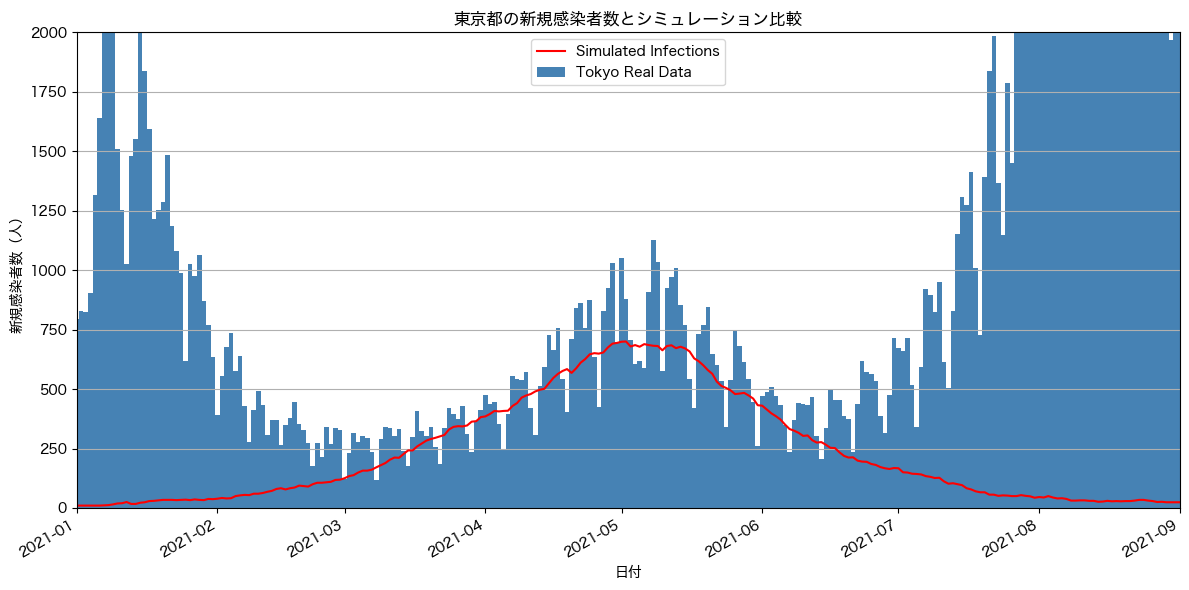

In [21]:
# 日付の範囲指定
start_date = pd.to_datetime("2021-01-01")
end_date = pd.to_datetime("2021-09-01")

# 実データ：Dateをdatetime型に変換
real_data["Date"] = pd.to_datetime(real_data["Date"])

# シミュレーションデータの日付列を作成（Day = 1 を start_date として）
sim_dates = start_date + pd.to_timedelta(df["Day"] - 1, unit="D")

# プロット
plt.figure(figsize=(12, 6))

# 実データの棒グラフ（例：東京都の新規感染者）
plt.bar(real_data["Date"], real_data["Tokyo"], width=1.0, color='steelblue', label="Tokyo Real Data")

# シミュレーションデータの感染者数（Exposed + Infectious）
plt.plot(sim_dates, df["Exposed"] + df["Infectious"], color='red', label="Simulated Infections")

# 軸の範囲制限
plt.xlim(start_date, end_date)
plt.ylim(0, 2000)

# 日付ラベルの整形
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()

# ラベル・タイトルなど
plt.title("東京都の新規感染者数とシミュレーション比較")
plt.xlabel("日付")
plt.ylabel("新規感染者数（人）")
plt.grid(True, axis='y')
plt.legend()
plt.tight_layout()
plt.show()

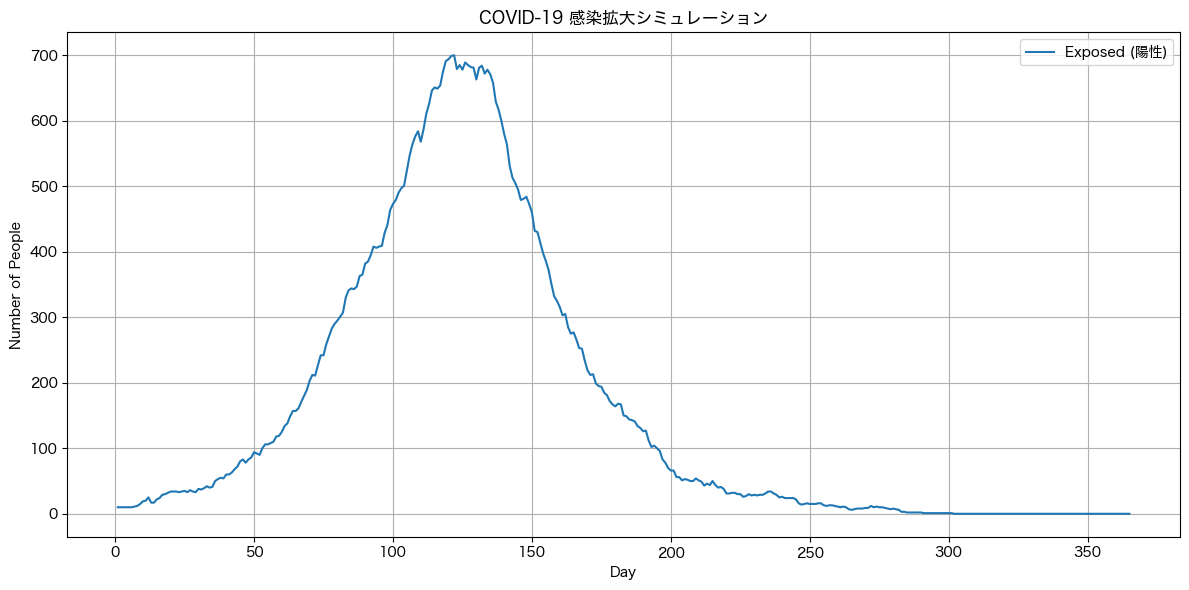

In [5]:
# グラフ描画
plt.figure(figsize=(12, 6))
plt.plot(df['Day'], df['Exposed']+df['Infectious'], label='Exposed (陽性)')

plt.xlabel('Day')
plt.ylabel('Number of People')
plt.title('COVID-19 感染拡大シミュレーション')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()